In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from random import randint
from google.colab.patches import cv2_imshow
from google.colab.files import upload
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from tensorflow import keras

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:

! kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format
! unzip az-handwritten-alphabets-in-csv-format.zip

In [11]:
add = "./A_Z Handwritten Data.csv"
da = pd.read_csv(add)

y = da["0"]
X = da.drop(["0"], axis=1)
alpha = {
    0: "a",
    1: "b",
    2: "c",
    3: "d",
    4: "e",
    5: "f",
    6: "g",
    7: "h",
    8: "i",
    9: "j",
    10: "k",
    11: "l",
    12: "m",
    13: "n",
    14: "o",
    15: "p",
    16: "q",
    17: "r",
    18: "s",
    19: "t",
    20: "u",
    21: "v",
    22: "w",
    23: "x",
    24: "y",
    25: "z",
}

y = y.replace(alpha)
X.where(da < 105, 1, inplace=True)
X.where(da >= 105, 0, inplace=True)
X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)

In [3]:
X = pd.read_csv("./X.csv")
y = pd.read_csv("./y.csv", squeeze=True)

FileNotFoundError: ignored

In [12]:
r = randint(0, X.shape[0])
img_sample_X = X.iloc[r].replace({1: 255}).values.reshape(28, 28)
img_sample_y = y[r]
cv2_imshow(img_sample_X)
print(img_sample_y.upper())

T


In [13]:
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.95)

In [15]:
model_ann = keras.models.Sequential(
    [
        keras.layers.Dense(
            units=28 * 28 * 2, activation="relu", input_shape=(28 * 28,)
        ),
        keras.layers.Dense(units=28 * 28 * 1.5, activation="relu"),
        keras.layers.Dense(units=28 * 28, activation="relu"),
        keras.layers.Dense(units=28 * 28 / 2, activation="relu"),
        keras.layers.Dense(units=512, activation="relu"),
        keras.layers.Dense(units=128, activation="relu"),
        keras.layers.Dense(units=26, activation="softmax"),
    ]
)
model_ann.compile(
    optimizer="Adagrad", loss="categorical_crossentropy", metrics=["accuracy"]
)
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1568)              1230880   
_________________________________________________________________
dense_1 (Dense)              (None, 1176)              1845144   
_________________________________________________________________
dense_2 (Dense)              (None, 784)               922768    
_________________________________________________________________
dense_3 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               201216    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 26)                3

In [16]:
history = model_ann.fit(
    X_train, y_train, batch_size=60, epochs=35, validation_data=(X_test, y_test)
)

Epoch 1/35
5898/5898 [==============================] - 45s 7ms/step - loss: 1.0659 - accuracy: 0.7110 - val_loss: 0.5097 - val_accuracy: 0.8597
Epoch 2/35
5898/5898 [==============================] - 41s 7ms/step - loss: 0.4010 - accuracy: 0.8910 - val_loss: 0.3413 - val_accuracy: 0.9060
Epoch 3/35
5898/5898 [==============================] - 40s 7ms/step - loss: 0.3006 - accuracy: 0.9186 - val_loss: 0.2730 - val_accuracy: 0.9275
Epoch 4/35
5898/5898 [==============================] - 40s 7ms/step - loss: 0.2472 - accuracy: 0.9329 - val_loss: 0.2388 - val_accuracy: 0.9341
Epoch 5/35
5898/5898 [==============================] - 40s 7ms/step - loss: 0.2121 - accuracy: 0.9426 - val_loss: 0.2093 - val_accuracy: 0.9420
Epoch 6/35
5898/5898 [==============================] - 40s 7ms/step - loss: 0.1871 - accuracy: 0.9495 - val_loss: 0.1873 - val_accuracy: 0.9475
Epoch 7/35
5898/5898 [==============================] - 40s 7ms/step - loss: 0.1684 - accuracy: 0.9548 - val_loss: 0.2585 - val_ac

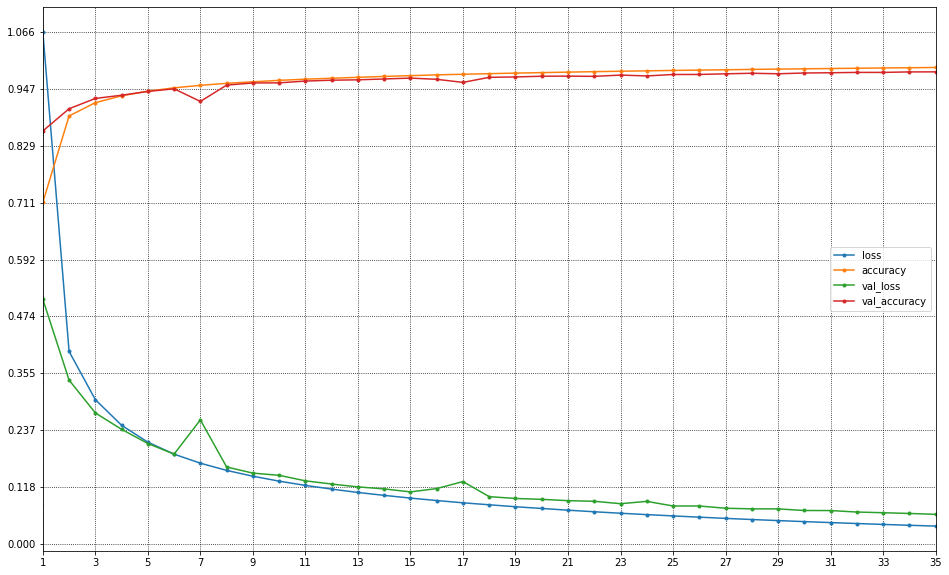

In [29]:
plt.figure(figsize=(16, 10))
plt.grid(axis="both", ls=":", color="k")
plt.xlim((1, 35))
plt.xticks(range(1, 36, 2))
plt.yticks(np.linspace(0, 1.0659, 10).tolist())
plt.plot(
    range(1, 36),
    history.history["loss"],
    range(1, 36),
    history.history["accuracy"],
    range(1, 36),
    history.history["val_loss"],
    range(1, 36),
    history.history["val_accuracy"],
    marker=".",
)
plt.legend([*history.history], loc="center right")
plt.show()

In [31]:
pres = model_ann.predict(X_test)
un_dic = np.argmax(pres, axis=1)
y_pred = pd.Series(alpha)[un_dic].values

In [59]:
classes = range(26)
y_test = pd.Series(alpha)[y_test.dot(classes)].values

In [68]:
(y_pred == y_test).sum() / y_pred.size * 100

98.2763249744939

In [85]:
model_ann.save("./alpha_model/")

INFO:tensorflow:Assets written to: ./alpha_model/assets
